In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spicy as st
import math
from scipy.stats import ttest_1samp

In [151]:
df = pd.read_csv('TPDatos.txt', header=None, delim_whitespace=True)
df = df.T
df.columns = ['almacenamiento', 'duracion']
df.head(5)

,almacenamiento,duracion
0,172.841048,19.930944
1,181.086954,29.391713
2,83.894914,21.667078
3,131.652344,21.586072
4,125.219752,24.454838


Ejercicio 1

"Antes de suponer una distribución conocida para cada variable, estimar las varianzas de forma insesgada (y por separado)"

Para buscar la varianza insesgada de ambos valores se procede a realiazar el calculo mediante la siguiente formula $$ s^2 = \frac{1}{n-1} \cdot \sum_{i=1}^{n} (x_i - \mathbb{E}[x]) 
^2$$  \ Para lo cual calculamos la media insesgeda, en este caso el promedio mediante el uso de las librerias disponibles en python. En un principio se busca la media de la siguiente forma:


In [152]:
media_almacenamiendo = df["almacenamiento"].mean()
media_duracion = df["duracion"].mean()

print("Esta es la media del almacenamiento en GB: ", media_almacenamiendo)
print("Esta es la media de la duracion en H: ", media_duracion)

Esta es la media del almacenamiento en GB:  127.58033271703853
Esta es la media de la duracion en H:  23.97210625986972


De manera que el calculo de la varianza se consigue facilmente usando los datos anteriormente calculados y la formula mencionada en el enunciado del ejercicio

In [153]:
var_almacenamiento = ((df["almacenamiento"] - media_almacenamiendo)**2).sum() / (len(df) - 1)
var_duracion = ((df["duracion"] - media_duracion)**2).sum() / (len(df) - 1)

print(f"La varianza del almacenamiento es: {var_almacenamiento} GB")
print(f"La varianza del la duracion es: {var_duracion} H")

La varianza del almacenamiento es: 1068.2440034213482 GB
La varianza del la duracion es: 15.566442716026044 H


Ejercicio 2

"Asumiendo que la distribucion de la capacidad de almacenamiento es normal, se desea hacer un test para rechazar que la media es $\mu_0^x$. Graficar el p-valor en función de $\mu_0^x$. Relacionar dicho grafico con el nivel de significacion. ¿Qué se puede decir del punto donde el p-valor alcanza el máximo?"ç

Diseño el test de hipotesis 

$H_0: \mathbb{E}[x] = \mu_0^x$ Test de hipotesis nula

$H_1: \mathbb{E}[x] \neq \mu_0^x$ Test de hipotesis alternativa 

Por lo tanto se diseña el test 

$\delta(X) = P(\mathbb{E}[x] > \mu_0^x)$

Genero muestras cercanas a la media 

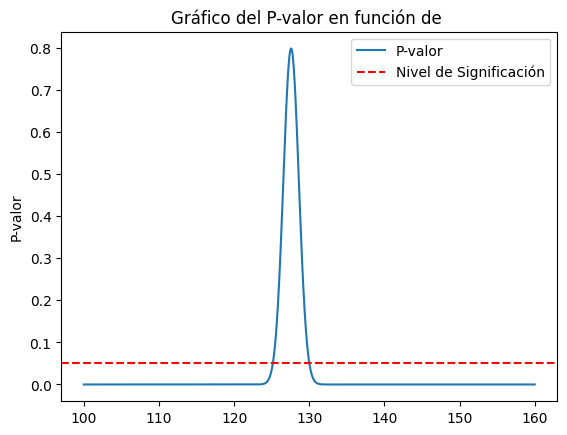

In [154]:
var_almacenamiento = np.var(df["almacenamiento"])
tamaño_muestra = len(df["almacenamiento"])
desviacion_estandar = np.sqrt(var_almacenamiento)
m_0_valores = np.linspace(100, 160, 1000)
pdf_valores_observados = st.stats.norm.pdf(df["almacenamiento"], loc=media_almacenamiendo, scale=desviacion_estandar)
p_valores = []
for mu_0 in m_0_valores:
    estadistico_t = (media_almacenamiendo - mu_0) / (desviacion_estandar / np.sqrt(tamaño_muestra))
    p_valor = 2 * st.stats.norm.pdf(np.abs(estadistico_t))
    p_valores.append(p_valor)
plt.plot(m_0_valores, p_valores, label='P-valor')
plt.axhline(0.05, color='red', linestyle='--', label='Nivel de Significación')
plt.xlabel('')
plt.ylabel('P-valor')
plt.title('Gráfico del P-valor en función de ')
plt.legend()
plt.show()

## Ejercicio 3

"Graficar la función de distribución empirica de la capacidad de almacenamietno y compararla con la curva correspondiente a una normal cuya media corresonda al valor que maximiza el p-valor del inciso 2 y cuya varianza sea la estimada en el inciso 1" 

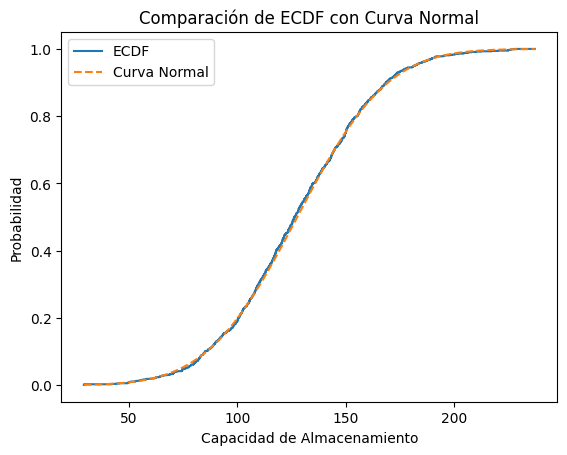

In [155]:
indice_max_p_valor = np.argmax(p_valores)
mu_optimo = m_0_valores[indice_max_p_valor]
data_ordenada = np.sort(df["almacenamiento"])
y = np.arange(1, len(df["almacenamiento"]) + 1) / len(df["almacenamiento"])
x_normal = np.linspace(min(df["almacenamiento"]), max(df["almacenamiento"]), 100)
y_normal = st.stats.norm.cdf(x_normal, loc=mu_optimo, scale=np.sqrt(var_almacenamiento))
plt.step(data_ordenada, y, label='ECDF')
plt.plot(x_normal, y_normal, label='Curva Normal', linestyle='--')
plt.xlabel('Capacidad de Almacenamiento')
plt.ylabel('Probabilidad')
plt.title('Comparación de ECDF con Curva Normal')
plt.legend()
plt.show()

## Ejercicio 4

"Antes de asumir una distriibucion conocida para la duración de las baterias, se desea hacer un tesst para rechazar que la media es $\mu_0^y$. Graficar el p-valor asintotico en funcion de $\mu_0^y$. Relacionar dicho grafico con el concepto de nivel de significación asintotico. ¿Que se puede decir del punto donde el p-valor alcanza el maximo?"

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Nacho\AppData\Local\Temp\ipykernel_5944\2574438607.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$\mu_0^y$')
C:\Users\Nacho\AppData\Local\Temp\ipykernel_5944\2574438607.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Gráfico del P-valor Asintótico en función de $\mu_0^y$')


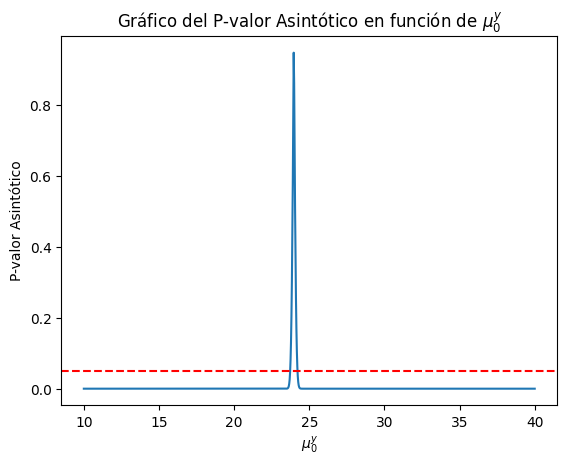

In [156]:
n = len(df["duracion"])
mu_0_y_valores = np.linspace(10, 40, 1000)
p_values_asintoticos = [2 * (1 - st.stats.norm.cdf(np.abs((media_duracion - mu_0_y) / (np.sqrt(var_duracion) / np.sqrt(n))))) for mu_0_y in mu_0_y_valores]
mu_0_y_max_p_valor = mu_0_y_valores[np.argmax(p_values_asintoticos)]
plt.plot(mu_0_y_valores, p_values_asintoticos, label='P-valor Asintótico')
plt.axhline(0.05, color='red', linestyle='--', label='Nivel de Significación Asintótico')
plt.xlabel('$\mu_0^y$')
plt.ylabel('P-valor Asintótico')
plt.title('Gráfico del P-valor Asintótico en función de $\mu_0^y$')
plt.show()

## Ejercicio 5

"Graficar el histograma de la duracion de las baterias y compararla con la curva correspondiente a la normal cuya media corresponda al valor que maximiza el p-valor asintotitco del inciso 4 y cuya varianza sea la estimada en el punto 1"

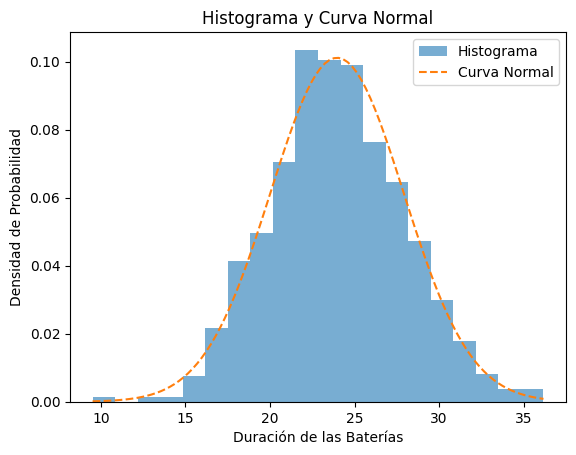

In [157]:
mu_0_y_max_p_valor = mu_0_y_valores[np.argmax(p_values_asintoticos)]
plt.hist(df["duracion"], bins=20, density=True, alpha=0.6, label='Histograma')
x_normal = np.linspace(min(df["duracion"]), max(df["duracion"]), 100)
y_normal = st.stats.norm.pdf(x_normal, loc=mu_0_y_max_p_valor, scale=np.sqrt(var_duracion))
plt.plot(x_normal, y_normal, label='Curva Normal', linestyle='--')
plt.xlabel('Duración de las Baterías')
plt.ylabel('Densidad de Probabilidad')
plt.title('Histograma y Curva Normal')
plt.legend()
plt.show()